<a href="https://colab.research.google.com/github/Priyanka-Police-Reddy-Gari/SpamDetection/blob/main/Priyanka_File1_SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'><b><font color='indianred'></p>Spam Detection</b></h1>

<font color = 'indianred' size = 4 >**Read the instructions** </font>


# <font color='indianred'> **Loading the dataset**

- For this We will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. We can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe.

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Renamed columns as label and message

- Finding the %  ham amd spam in the data.





In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
spam_data = pd.read_csv('/content/drive/MyDrive/NLP/Assignment_2/spam.csv',encoding='latin1')
print(spam_data)

Mounted at /content/drive
        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1  

In [ ]:
columns_to_delete = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' ]
spam_df = spam_data.drop(columns=columns_to_delete)
print(spam_df.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
spam_df = spam_df.rename(columns={'v1':'label','v2':'message'})
print(spam_df.columns)
print(spam_df.head())

Index(['label', 'message'], dtype='object')
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
label_count = spam_df['label'].value_counts(normalize=True)
ham_percentage = label_count.get('ham',0) * 100
spam_percentage = label_count.get('spam',0) * 100
print("Percentage of ham",ham_percentage,"%")
print("Percentage of spam",spam_percentage,"%")

Percentage of ham 86.59368269921033 %
Percentage of spam 13.406317300789663 %


# <font color='indianred'> **Providing the metric for evaluating model**</font>

As We will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So we need to choose a different metric.

Task: Providing the metric you will choose to evaluate your model. Explaining why this is an appropriate metric for this case.

Precision is the ratio of True positives by sum of True positives and False Positives. This is an important metrics when the cost of False positive is high. Precision identifies the Spam message amoung all messages predicted as spam.

Whereas Recall is the ratio of True positives by sum of True positives and False Negative. This is important when cost of False Negative is High.Recall correctly identifies all actual spam messages.

By considering both **F1 score** would be perfect evaluation metric which provides balance between both precision and Recall. F1 score is suitable when there is uneven class dsitribution like we have inthis scenario and the goal of F1 score is to achieve a balance between False Positives and False Negatives where the cost of both varies.

Or by considering Just Precision.

# <font color='indianred'> **Classification Pipelines**</font>

We learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* We will now use folllowing methods to create fearures which you can use in your model.

    1. Sparse Embeddings (TF-IDF)
    2. Feature Engineering (see examples below)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering

**Approach:**

<font color='indianred'> ****Using a smaller subset of dataset (e.g. 5-10 %) to evaluate the three pipelines . Based on our analysis (e.g. model score, learning curves) , choosing one pipeline from the three. Provided rational for choosing the pipleine. Training only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:**

1. We can use any ML model (Logistic Regression, XgBoost) for the classification. We will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, We can choose from the examples below. We do not  have to use all of them. We can add other featues as well. Thought about what features can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/).

3. For Sparse embeddings we will use **tfidf vectorization**. We need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.).

4. Thought carefully about the pre-processing we will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time So tried using RandomizedSearch.**</font> We can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn:

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





In [ ]:
#Data Processing
!pip install -U spacy -qq

In [ ]:
import spacy
print(spacy.__version__)


3.7.2


In [ ]:
#Download Model
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
#Load Model
nlp = spacy.load('en_core_web_lg')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(spam_df, test_size=0.2)

In [ ]:
train_smaller = train.sample(frac=0.1, replace=True, random_state=1)
test_smaller = test.sample(frac=0.1, replace=True, random_state=1)

In [ ]:
train_smaller.head()

,label,message
4075,spam,87077: Kick off a new season with 2wks FREE go...
2142,ham,You see the requirements please
449,ham,10 min later k...
574,ham,Nope i waiting in sch 4 daddy...
2127,ham,Tessy..pls do me a favor. Pls convey my birthd...


## Data Preprocessing

In [ ]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
sys.path.append('/content/drive/MyDrive/NLP/data/custom-functions')

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/NLP/data/custom-functions']

In [ ]:
data_folder = sys.path


In [ ]:
import CustomPreprocessorSpacy as cp
from FeaturizerSpacy import ManualFeatures
from plot_learning_curve import plot_learning_curve

In [ ]:
X_train = train_smaller['message'].values
X_test = test_smaller['message'].values
y_train = train_smaller['label'].values
y_test = test_smaller['label'].values

In [ ]:
X_train_smaller_cleaned = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 500).transform(X_train)
X_test_smaller_cleaned = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 500).transform(X_test)

/content/drive/MyDrive/NLP/data/custom-functions/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
import joblib

In [ ]:
# file_train_small_cleaned = data_folder / 'train_small_cleaned.pkl'
# joblib.dump(train_smaller_cleaned,file_train_small_cleaned)

In [ ]:
print(X_train_smaller_cleaned)
print(X_test_smaller_cleaned)

['87077 kick new season 2wks free goal news ur mobile txt ur club 87077 eg villa 87077', 'requirement', '10 min later k', 'nope wait sch 4 daddy', 'tessy pls favor pls convey birthday wish nimya pls dnt forget today birthday shijas', 'reach home safe n sound liao', 'izzit rain', 'hcl chennai require fresher voice process excellent english need salary upto   < > .call ms. suman   < >   telephonic interview -via', 'good word word leave u dismay time', 'lolnice go fish water', 'gr8 new service live sex video chat mob sexy dirty girl live ur phone 4 detail text horny 89070 cancel send stop 89070', 'hi wlcome wonder get eat lion', 's go ruin thesis', 'christmassy', '', 'aathi dear', 'k come nordstrom', 'go ur hon lab', 'mah b pick tomorrow', 'check iq', 'sorry later', 'send jd customer service cum account executive ur mail d detail contact', 'love aathi love u lot', 'hey gal u go e drive centre tmr', 'request maangalyam alaipayuthe set callertune callers press 9 copy friend callertune', 'pr

## Sparse Embedding

In [ ]:
# Import scikit-learn classes for building models
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator

from scipy.sparse import csr_matrix

In [ ]:
classifier_1 = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")),
    ('classifier', LogisticRegression(max_iter=10000)),])

In [ ]:
param_grid_classifier_1 = {'vectorizer__max_features': [1000, 2000, 5000],
                           'classifier__C': [1, 10, 100,],
                            'classifier__class_weight':["balanced"]
                           }

In [ ]:
grid_classifier_1 = RandomizedSearchCV(
    estimator=classifier_1, param_distributions=param_grid_classifier_1, cv=3, scoring = 'f1_macro')

In [ ]:
grid_classifier_1.fit(X_train_smaller_cleaned, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('vectorizer',
                                              TfidfVectorizer(token_pattern='[\\S]+')),
                                             ('classifier',
                                              LogisticRegression(max_iter=10000))]),
                   param_distributions={'classifier__C': [1, 10, 100],
                                        'classifier__class_weight': ['balanced'],
                                        'vectorizer__max_features': [1000, 2000,
                                                                     5000]},
                   scoring='f1_macro')

In [ ]:
print(f'Best cross-validation score: {grid_classifier_1.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_1.best_params_)
print("\nBest estimator: ", grid_classifier_1.best_estimator_)

Best cross-validation score: 0.94

Best parameters:  {'vectorizer__max_features': 1000, 'classifier__class_weight': 'balanced', 'classifier__C': 100}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=1000, token_pattern='[\\S]+')),
                ('classifier',
                 LogisticRegression(C=100, class_weight='balanced',
                                    max_iter=10000))])


In [ ]:
data_folder = data_folder[-1]
print(data_folder)
type(data_folder)

/content/drive/MyDrive/NLP/data/custom-functions


str

In [ ]:
from pathlib import Path
basepath='/content/drive/MyDrive/NLP/data'
data_folder=Path(basepath)
file_best_estimator_pipeline1_round1 = data_folder/ 'pipeline1_round1_best_estimator.pkl'
file_complete_grid_pipeline1_round1 = data_folder/'pipeline1_round1_complete_grid.pkl'


In [ ]:
file_X_train_smaller_cleaned = data_folder / 'x_train_cleaned_bow_small.pkl'
joblib.dump(X_train_smaller_cleaned, file_X_train_smaller_cleaned)
file_X_test_smaller_cleaned = data_folder / 'x_train_cleaned_bow_small.pkl'
joblib.dump(X_test_smaller_cleaned, file_X_test_smaller_cleaned)

['/content/drive/MyDrive/NLP/data/x_train_cleaned_bow_small.pkl']

In [ ]:
joblib.dump(grid_classifier_1.best_estimator_, file_best_estimator_pipeline1_round1)
joblib.dump(grid_classifier_1, file_complete_grid_pipeline1_round1)

['/content/drive/MyDrive/NLP/data/pipeline1_round1_complete_grid.pkl']

In [ ]:
best_estimator_pipeline1_round1 = joblib.load(
    file_best_estimator_pipeline1_round1)
complete_grid_pipeline1_round1 = joblib.load(
    file_complete_grid_pipeline1_round1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

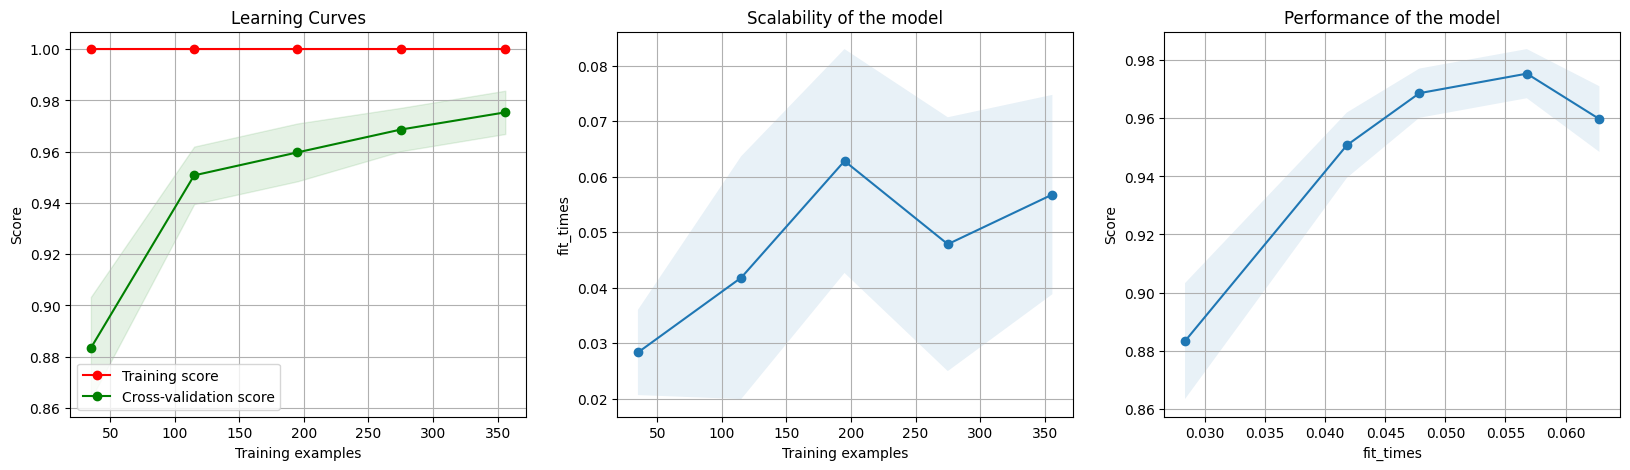

In [ ]:
# plot learning curces
plot_learning_curve(best_estimator_pipeline1_round1, 'Learning Curves',
                    X_train_smaller_cleaned, y_train, n_jobs=-1)

In [ ]:
# let's check the train scores
print(best_estimator_pipeline1_round1.score(
    X_train_smaller_cleaned, y_train))

# let's check the cross validation score
print(complete_grid_pipeline1_round1.best_score_)

1.0
0.9437136838937256


In [ ]:
# Final Pipeline
def final_pipeline(text):
    # cleaned_text = cp.SpacyPreprocessor(model='en_core_web_sm').transform(text)
    cleaned_text = X_test_smaller_cleaned
    best_estimator_pipeline1_round1 = joblib.load(
        file_best_estimator_pipeline1_round1)
    predictions = best_estimator_pipeline1_round1.predict(cleaned_text)
    return predictions

In [ ]:
y_test_pred = final_pipeline(X_test)

In [ ]:
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

         ham       0.99      1.00      0.99        96
        spam       1.00      0.94      0.97        16

    accuracy                           0.99       112
   macro avg       0.99      0.97      0.98       112
weighted avg       0.99      0.99      0.99       112



## Feature Engineering

In [ ]:
X_train_cleaned_basic = cp.SpacyPreprocessor(model='en_core_web_sm',
                                                    lemmatize=False, lower=False,
                                                    remove_stop=False, remove_punct=False,
                                                    remove_email=False, remove_url=False,
                                                     add_user_mention_prefix=False,
                                                     basic_clean_only=True).transform(X_train)

/content/drive/MyDrive/NLP/data/custom-functions/CustomPreprocessorSpacy.py:83: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
file_X_train_cleaned_basic = data_folder / 'x_train_cleaned_basic_small.pkl'
joblib.dump(X_train_cleaned_basic, file_X_train_cleaned_basic)

['/content/drive/MyDrive/NLP/data/x_train_cleaned_basic_small.pkl']

In [ ]:
X_test_cleaned_basic = cp.SpacyPreprocessor(model='en_core_web_sm',
                                                    lemmatize=False, lower=False,
                                                    remove_stop=False, remove_punct=False,
                                                    remove_email=False, remove_url=False,
                                                     add_user_mention_prefix=False,
                                                     basic_clean_only=True).transform(X_test)

In [ ]:
file_X_test_cleaned_basic = data_folder / 'x_test_cleaned_basic_small.pkl'
joblib.dump(X_test_cleaned_basic, file_X_test_cleaned_basic)

['/content/drive/MyDrive/NLP/data/x_test_cleaned_basic_small.pkl']

In [ ]:
featurizer = ManualFeatures(spacy_model='en_core_web_sm', batch_size = 1000)

In [ ]:
X_train_cleaned_basic = joblib.load(file_X_train_cleaned_basic)

In [ ]:
X_train_features, feature_names = featurizer.fit_transform(X_train_cleaned_basic)

In [ ]:
X_train_features[0:3]

array([[ 24. , 114. ,  90. ,   3.6,   3. ,   2. ,   7. ,   0. ,   3. ,
          3. ,   5. ],
       [  5. ,  31. ,  27. ,   4.5,   0. ,   1. ,   1. ,   0. ,   1. ,
          0. ,   0. ],
       [  4. ,  17. ,  14. ,   2.8,   1. ,   1. ,   1. ,   0. ,   0. ,
          0. ,   1. ]])

In [ ]:
feature_names

['count_words',
 'count_characters',
 'count_characters_no_space',
 'avg_word_length',
 'count_numbers',
 'count_sentences',
 'noun_count',
 'aux_count',
 'verb_count',
 'adj_count',
 'ner']

In [ ]:
classifier_2 = Pipeline([
    ('classifier', LogisticRegression(max_iter=10000)),
])

In [ ]:
param_grid_classifier_2 = {'classifier__C': [100000],'classifier__class_weight':["balanced"]}

In [ ]:
grid_classifier_2 = RandomizedSearchCV(estimator=classifier_2,
                                 param_distributions=param_grid_classifier_2,
                                 cv=3, scoring = 'f1_macro')

In [ ]:
# Fit the model on training data
grid_classifier_2.fit(X_train_features, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('classifier',
                                              LogisticRegression(max_iter=10000))]),
                   param_distributions={'classifier__C': [100000],
                                        'classifier__class_weight': ['balanced']},
                   scoring='f1_macro')

In [ ]:
print(f'Best cross-validation score: {grid_classifier_2.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_2.best_params_)
print("\nBest estimator: ", grid_classifier_2.best_estimator_)

Best cross-validation score: 0.88

Best parameters:  {'classifier__class_weight': 'balanced', 'classifier__C': 100000}

Best estimator:  Pipeline(steps=[('classifier',
                 LogisticRegression(C=100000, class_weight='balanced',
                                    max_iter=10000))])


In [ ]:
file_best_estimator_pipeline2_round1 = data_folder / \
    'pipeline2_round1_best_estimator.pkl'
file_complete_grid_pipeline2_round1 = data_folder / \
    'pipeline2_round1_complete_grid.pkl'

In [ ]:
joblib.dump(grid_classifier_2.best_estimator_,
            file_best_estimator_pipeline2_round1)
joblib.dump(grid_classifier_2, file_complete_grid_pipeline2_round1)

['/content/drive/MyDrive/NLP/data/pipeline2_round1_complete_grid.pkl']

In [ ]:
best_estimator_pipeline2_round1 = joblib.load(
    file_best_estimator_pipeline2_round1)
complete_grid_pipeline2_round1 = joblib.load(
    file_complete_grid_pipeline2_round1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

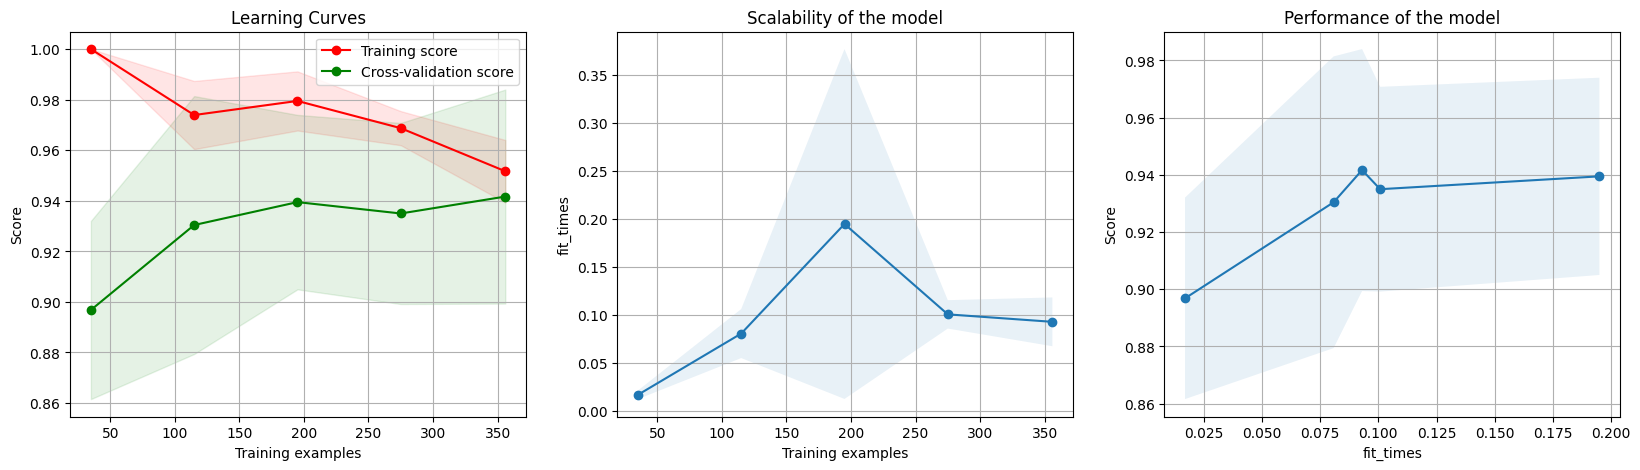

In [ ]:
# plot learning curves
plot_learning_curve(best_estimator_pipeline2_round1, 'Learning Curves',
                    X_train_features, y_train, n_jobs=-1)

In [ ]:
# let's check the train scores
print(best_estimator_pipeline2_round1.score(X_train_features, y_train))

# let's check the cross validation score
print(complete_grid_pipeline2_round1.best_score_)

0.9439461883408071
0.8818834272761129


In [ ]:
# Final Pipeline
def final_pipeline(text):
    text_cleaned = joblib.load(file_X_test_cleaned_basic)
    features, feature_names = featurizer.fit_transform(text_cleaned)
    best_estimator_pipeline2_round1 = joblib.load(
        file_best_estimator_pipeline2_round1)
    predictions = best_estimator_pipeline2_round1.predict(features)
    return predictions

In [ ]:
# predicted values for Test data set
y_test_pred = final_pipeline(X_test)

In [ ]:
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred))


Test set classification report:

               precision    recall  f1-score   support

         ham       1.00      0.95      0.97        96
        spam       0.76      1.00      0.86        16

    accuracy                           0.96       112
   macro avg       0.88      0.97      0.92       112
weighted avg       0.97      0.96      0.96       112



## 3. Sparse Embeddings + Feature Engineering

In [ ]:
X_train_smaller_cleaned = joblib.load(file_X_train_smaller_cleaned)

In [ ]:
X_train_final = pd.concat((pd.DataFrame(X_train_smaller_cleaned, columns=['cleaned_text']),
                           pd.DataFrame(X_train_features, columns=feature_names)), axis=1)

In [ ]:
X_train_final.head()

,cleaned_text,count_words,count_characters,count_characters_no_space,avg_word_length,count_numbers,count_sentences,noun_count,aux_count,verb_count,adj_count,ner
0,wish family merry \x\ mas happy new year advance,24.0,114.0,90.0,3.600000,3.0,2.0,7.0,0.0,3.0,3.0,5.0
1,sppok ur mob halloween collection nokia logo&p...,5.0,31.0,27.0,4.500000,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,pdate_now double min 1000 txt orange tariff la...,4.0,17.0,14.0,2.800000,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3,cos want thing,7.0,32.0,26.0,3.250000,1.0,1.0,2.0,0.0,1.0,0.0,1.0
4,garbage bag egg jam bread hannaford wheat chex,22.0,113.0,94.0,4.086957,0.0,3.0,9.0,1.0,4.0,0.0,3.0


In [ ]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cleaned_text               112 non-null    object 
 1   count_words                446 non-null    float64
 2   count_characters           446 non-null    float64
 3   count_characters_no_space  446 non-null    float64
 4   avg_word_length            446 non-null    float64
 5   count_numbers              446 non-null    float64
 6   count_sentences            446 non-null    float64
 7   noun_count                 446 non-null    float64
 8   aux_count                  446 non-null    float64
 9   verb_count                 446 non-null    float64
 10  adj_count                  446 non-null    float64
 11  ner                        446 non-null    float64
dtypes: float64(11), object(1)
memory usage: 41.9+ KB


In [ ]:
subset = X_train_final[0:10]

In [ ]:
subset.shape

(10, 12)

In [ ]:
class SparseTransformer(TransformerMixin, BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return csr_matrix(X)

In [ ]:
sparse_features = Pipeline([('sparse', SparseTransformer()), ])
vectorizer = Pipeline([('tfidf', TfidfVectorizer(max_features=5)), ])

In [ ]:
sparse_features.fit_transform(subset.iloc[:, 1:])

<10x11 sparse matrix of type '<class 'numpy.float64'>'
	with 83 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.fit_transform(subset.iloc[:, 0])

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [ ]:
combined_features = ColumnTransformer(
    transformers=[
        ('tfidf', vectorizer, 'cleaned_text'),
    ], remainder=sparse_features
)

In [ ]:
test = combined_features.fit_transform(subset)

In [ ]:
test


array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  24.        , 114.        ,  90.        ,
          3.6       ,   3.        ,   2.        ,   7.        ,
          0.        ,   3.        ,   3.        ,   5.        ],
       [  0.        ,   0.5       ,   0.5       ,   0.5       ,
          0.5       ,   5.        ,  31.        ,  27.        ,
          4.5       ,   0.        ,   1.        ,   1.        ,
          0.        ,   1.        ,   0.        ,   0.        ],
       [  0.56183624,   0.        ,   0.47761213,   0.47761213,
          0.47761213,   4.        ,  17.        ,  14.        ,
          2.8       ,   1.        ,   1.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   1.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   7.        ,  32.        ,  26.        ,
          3.25      ,   1.        ,   1.        ,   2.        ,
          0.        ,   1.        ,  

In [ ]:
test.dtype

dtype('float64')

In [ ]:
classifier_3 = Pipeline([('combined_features',  combined_features),
                         ('classifier', LogisticRegression(max_iter=10000)),
                         ])


In [ ]:
classifier_3.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'combined_features', 'classifier', 'combined_features__n_jobs', 'combined_features__remainder__memory', 'combined_features__remainder__steps', 'combined_features__remainder__verbose', 'combined_features__remainder__sparse', 'combined_features__remainder', 'combined_features__sparse_threshold', 'combined_features__transformer_weights', 'combined_features__transformers', 'combined_features__verbose', 'combined_features__verbose_feature_names_out', 'combined_features__tfidf', 'combined_features__tfidf__memory', 'combined_features__tfidf__steps', 'combined_features__tfidf__verbose', 'combined_features__tfidf__tfidf', 'combined_features__tfidf__tfidf__analyzer', 'combined_features__tfidf__tfidf__binary', 'combined_features__tfidf__tfidf__decode_error', 'combined_features__tfidf__tfidf__dtype', 'combined_features__tfidf__tfidf__encoding', 'combined_features__tfidf__tfidf__input', 'combined_features__tfidf__tfidf__lowercase', 'combined_features__tfidf_

In [ ]:
param_grid_classifier_3 = {'combined_features__tfidf__tfidf__max_features': [500, 1000, 2000],
                           'classifier__C': [0.1, 1, 10], 'classifier__class_weight': [ "balanced"]
                           }

grid_classifier_3 = RandomizedSearchCV(estimator=classifier_3,
                                 param_distributions=param_grid_classifier_3,
                                 cv=3,scoring='f1_macro')

# Fit the model on training data
grid_classifier_3.fit(X_train_final, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ValueError: 
All the 27 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 727, in fit_transform
    result = self._fit_transform(X, y, _fit_transform_one)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 658, in _fit_transform
    return Parallel(n_jobs=self.n_jobs)(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 123, in __call__
    return self.function(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 445, in fit_transform
    return last_step.fit_transform(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py", line 2133, in fit_transform
    X = super().fit_transform(raw_documents)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py", line 1275, in _count_vocab
    for feature in analyze(doc):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py", line 106, in _analyze
    doc = decoder(doc)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py", line 239, in decode
    raise ValueError(
ValueError: np.nan is an invalid document, expected byte or unicode string.


In [ ]:
print(
    "Best cross-validation score: {:.2f}".format(grid_classifier_3.best_score_))
print("\nBest parameters: ", grid_classifier_3.best_params_)
print("\nBest estimator: ", grid_classifier_3.best_estimator_)

In [ ]:
file_best_estimator_pipeline3_round1 = data_folder / \
    'pipeline3_round1_best_estimator.pkl'
file_complete_grid_pipeline3_round1 = data_folder / \
    'pipeline3_round1_complete_grid.pkl'

In [ ]:
joblib.dump(grid_classifier_3.best_estimator_,
            file_best_estimator_pipeline3_round1)
joblib.dump(grid_classifier_3, file_complete_grid_pipeline3_round1)

In [ ]:
# load the saved model
best_estimator_pipeline3_round1 = joblib.load(
    file_best_estimator_pipeline3_round1)
complete_grid_pipeline3_round1 = joblib.load(
    file_complete_grid_pipeline3_round1)

In [ ]:
# plot learning curces
plot_learning_curve(best_estimator_pipeline3_round1, 'Learning Curves',
                    X_train_final, y_train, n_jobs=-1)

In [ ]:
# let's check the train scores
print(best_estimator_pipeline3_round1.score(X_train_final, y_train))

# let's check the cross validation score
print(complete_grid_pipeline3_round1.best_score_)

In [ ]:
X_test.shape

In [ ]:
# Final Pipeline
def final_pipeline(text):
    # cleaned_text = cp.SpacyPreprocessor(model='en_core_web_sm', batch_size = 1000).transform(text)
    cleaned_text = joblib.load(file_X_test_smaller_cleaned)
    X_features, feature_names = featurizer.fit_transform(text)
    X_final = pd.concat((pd.DataFrame(cleaned_text, columns=['cleaned_text']),
                         pd.DataFrame(X_features, columns=feature_names)), axis=1)
    best_estimator_pipeline3_round1 = joblib.load(
        file_best_estimator_pipeline3_round1)
    predictions = best_estimator_pipeline3_round1.predict(X_final)
    return predictions

In [ ]:
y_test_pred = final_pipeline(X_test)

In [ ]:
print('\nTest set classification report:\n\n',
      classification_report(y_test, y_test_pred))